### Modules

In [1]:
# basic
import os, sys, glob
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

### Figure 4B

In [2]:
### 'ivtratio_m6atm.csv' contains predictions results of in-silico mixed IVT sites with random m6A ratio

Text(0, 0.5, 'Predicted m6A ratio')

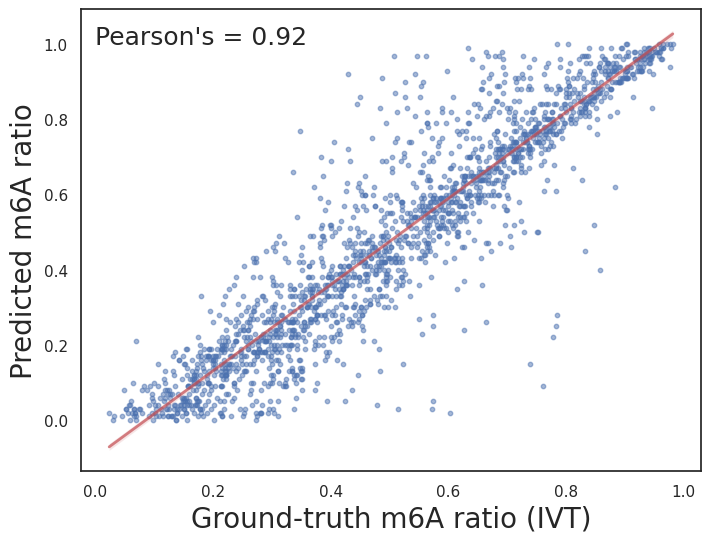

In [3]:
### correlation plot
pred = pd.read_csv('../data/ivtratio_m6atm.csv')

ratio = pred.ratio.tolist()
gth = pred.gth.tolist()

corr = round(pearsonr(ratio, gth)[0], 2)

### plot
sns.set_theme(style = 'white') # theme
tab_color = sns.color_palette() # color palette
fig, ax = plt.subplots(figsize = (8, 6)) # figure size

sns.regplot(x = ratio, y = gth,
            scatter_kws = {'alpha': 0.5, 's': 10},
            line_kws = {'color': tab_color[3], 'linewidth': 2, 'alpha': 0.7})

ax.text(0.18, 1, 'Pearson\'s = %s'%(corr), horizontalalignment = 'center', fontsize = 18)
ax.set_xlabel('Ground-truth m6A ratio (IVT)', fontsize = 20)
ax.set_ylabel('Predicted m6A ratio', fontsize = 20)

### Figure 4C

In [4]:
### 'ivtratio_coverage_m6atm.csv' contains predictions results of in-silico mixed IVT sites with random m6A ratio using different read coverages

In [5]:
pred = pd.read_csv('../data/ivtratio_coverage_m6atm.csv')

corr_list = []
coverage_list = sorted(list(set(pred.group)))
for i in coverage_list:
    
    table = pred[pred.group == i]
    
    ratio = table.ratio.tolist()
    gth = table.gth.tolist()
    corr = round(pearsonr(ratio, gth)[0], 2)
    corr_list.append(corr)

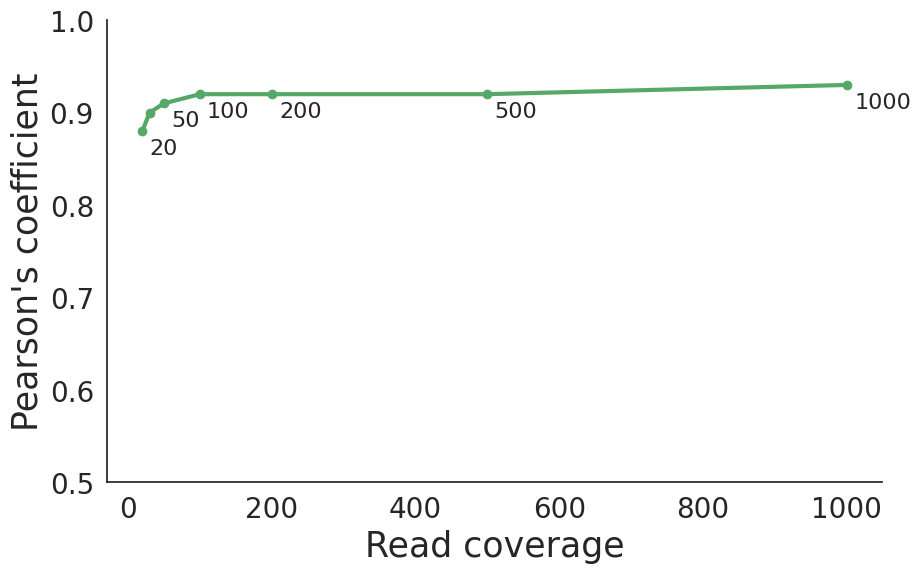

In [6]:
##### main
sns.set_theme(style = 'white') # theme
tab_color = sns.color_palette() # color palette
fig, ax = plt.subplots(figsize = (10, 6)) # figure size

# plot the scatter plot with regression line and Pearson's coefficient
x_val = coverage_list
y_val = corr_list
ax.plot(x_val, y_val, marker = 'o', color = tab_color[2], lw = 3)

ax.set_xlabel('Read coverage', fontsize = 25)
ax.set_ylabel('Pearson\'s coefficient', fontsize = 25)
ax.set_ylim([0.5, 1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(labelsize = 20)

for i, text in enumerate(x_val):
    if text!=30:
        ax.annotate(str(text), (x_val[i]+10, y_val[i]-0.025), fontsize = 16)

### Figure 4D

In [7]:
pred_ivtr50 = pd.read_csv('../data/ivtr50_m6atm.csv')
pred_ivtr20 = pd.read_csv('../data/ivtr20_m6atm.csv')

pred_ivtr50 = pred_ivtr50[(pred_ivtr50.probability>=0.9) | (pred_ivtr50.probability<0.5)]
pred_ivtr20 = pred_ivtr20[(pred_ivtr20.probability>=0.9) | (pred_ivtr20.probability<0.5)]

ratio_50 = pred_ivtr50.ratio.tolist()
ratio_20 = pred_ivtr20.ratio.tolist()

ratio_list = ratio_20+ratio_50
group_list = ['IVTR-20%']*len(ratio_20)+['IVTR-50%']*len(ratio_50)
ratio_table = pd.DataFrame({'ratio': ratio_list, 'group': group_list})

Text(0, 0.5, 'Predicted m6A ratio')

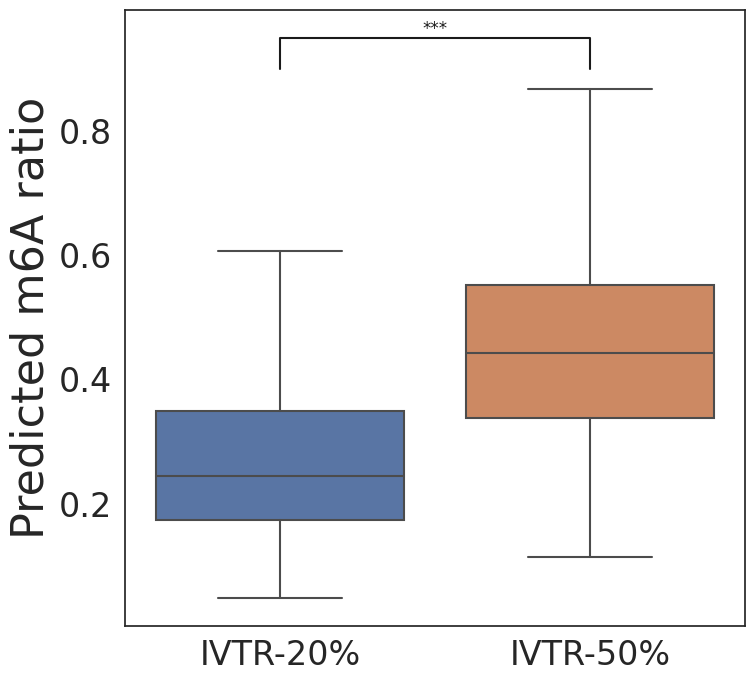

In [8]:
### plot
sns.set_theme(style = 'white') # theme
tab_color = sns.color_palette() # color palette
fig, ax = plt.subplots(figsize = (8, 8)) # figure size

sns.boxplot(x = 'group', y ='ratio', data = ratio_table, showfliers = False)

# asterisks
x1, x2 = 0, 1
y, h, col = ratio_table['ratio'].max()*0.9, 0.05, 'k'

pval = stats.median_test(ratio_20, ratio_50)[1]
if pval < 0.001:
    symbol = '***'
elif pval < 0.01:
    symbol = '**'
elif pval < 0.05:
    symbol = '*'
else:
    symbol = 'ns'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw = 1.5, c = col)
plt.text((x1+x2)*.5, y+h, symbol, ha = 'center', va = 'bottom', color = col)

ax.tick_params(labelsize = 24)
ax.set_xlabel(None)
ax.set_ylabel('Predicted m6A ratio', size = 32)

### Fig 4E

In [9]:
pred_hek293twt = pd.read_csv('../data/hek293twt_m6atm.csv')
pred_hek293tko = pd.read_csv('../data/hek293tko_m6atm.csv')

pred_hek293twt = pred_hek293twt[pred_hek293twt.coverage>=100]
pred_hek293tko = pred_hek293tko[pred_hek293tko.coverage>=100]

pred_hek293twt = pred_hek293twt[pred_hek293twt.ratio<0.5]
pred_hek293tko = pred_hek293tko[pred_hek293tko.ratio<0.5]

p_table = pred_hek293twt[pred_hek293twt.probability>=0.9]
n_table = pred_hek293tko[pred_hek293tko.probability<0.1]

table = p_table.merge(n_table, how = 'inner', on = ['transcript', 'position']).loc[:,['transcript', 'position']]
ratio_wt = pred_hek293twt.merge(table, how = 'inner', on = ['transcript', 'position']).ratio.tolist()
ratio_ko = pred_hek293tko.merge(table, how = 'inner', on = ['transcript', 'position']).ratio.tolist()

ratio_list = ratio_wt+ratio_ko
group_list = ['HEK293T-WT']*len(ratio_wt)+['HEK293T-METTL3_KO']*len(ratio_ko)
ratio_table = pd.DataFrame({'ratio': ratio_list, 'group': group_list})

Text(0, 0.5, 'Predicted m6A ratio')

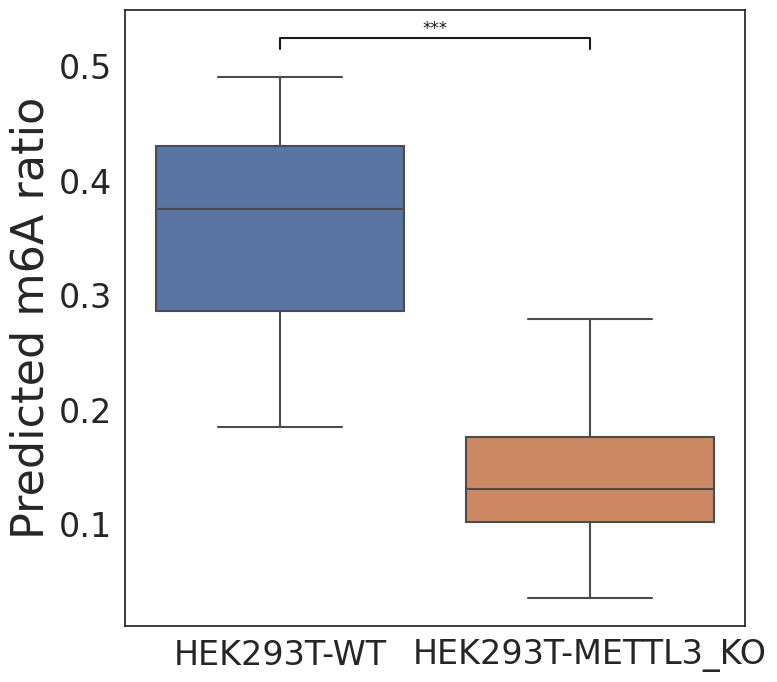

In [10]:
### plot
sns.set_theme(style = 'white') # theme
tab_color = sns.color_palette() # color palette
fig, ax = plt.subplots(figsize = (8, 8)) # figure size

sns.boxplot(x = 'group', y ='ratio', data = ratio_table, showfliers = False)

# asterisks
x1, x2 = 0, 1
y, h, col = ratio_table['ratio'].max()*1.05, 0.01, 'k'

pval = stats.median_test(ratio_wt, ratio_ko)[1]
if pval < 0.001:
    symbol = '***'
elif pval < 0.01:
    symbol = '**'
elif pval < 0.05:
    symbol = '*'
else:
    symbol = 'ns'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw = 1.5, c = col)
plt.text((x1+x2)*.5, y+h, symbol, ha = 'center', va = 'bottom', color = col)    
    
ax.tick_params(labelsize = 24)
ax.set_xlabel(None)
ax.set_ylabel('Predicted m6A ratio', size = 32)